# Python Toolkit

In [31]:
from sixgill.pipesim import Model
from sixgill.definitions import ModelComponents, Parameters, Constants, Units
import main

In [32]:
tr_path="data/Техрежим, Муравленко, декабрь 2021_Действующие_Суторминское.xls"
model_directory="data/модели pipesim"
esp_db_path="esp_db.json"

In [33]:
# Количество скважин с техрежима для расчета
number_of_wells=1

### Сначала создадим модели, а потом уже будем работать с готовыми моделями

In [4]:
main.make_models(
    tr_path=tr_path,
    model_directory=model_directory,
    esp_db_path=esp_db_path,
    number_of_wells=number_of_wells
                )

INFO:manta.server.manager:Starting PIPESIM server on thread ID: 9532


Создадим модель для скважины: 8K


C:\Users\Alexey\anaconda3\lib\subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
INFO:manta.server.manager:Waiting for PIPESIM server to start and Python_Toolkit license check out.
INFO:manta.server.manager:Starting PIPESIM server on thread ID: 9576
INFO:sixgill.core.metadata:Using cached metadata for 'http://localhost:62082/api/metadata#'


*Модели должны появиться в пути model_directory с названием файлов как названия скважин*

**Самостоятельно** откройте модель для изучения того, что получилось, и сравните с технологическим режимом

В sixgill.Model есть метод **open_ui()**, который к сожалению не работает через anaconda,  в случае если бы он работал, то можно было открыть интерфейс командой из python


*Построение модели происходит в файлике _pipesim_model.py, откройте его для изучения, если интересно*

### Рассчитаем кривую распределения давления сверху вниз

In [5]:
model_name = "8K"
results = main.calc_pt(model_directory + f"/{model_name}.pips",
             model_name,
             p_wh = 10,
             q_liq = 100
            )

# Либо можно низкоуровнево
# model = Model.open(model_directory + f"/{model_name}.pips", units=Units.METRIC)
# model.tasks.ptprofilesimulation.run(producer=model_name,
#                                                   parameters=parameters)

INFO:manta.server.manager:Starting PIPESIM server on thread ID: 15536
INFO:sixgill.core.metadata:Using cached metadata for 'http://localhost:62089/api/metadata#'
INFO:sixgill.core.simulations:Simulation is running.
INFO:sixgill.core.simulations:Simulation is finished.
INFO:sixgill.core.simulations:Simulation run successfully.


#### Изучим, что получилось

*По умолчанию, если не задавать parameters в функции, то расчет идет сверху вниз от буферного до пластового давления*

In [6]:
# System results - дискретные результаты 
system_results = results[0]
system_results

,Unit,Inlet Pressure=6964.149 psia
SGLV: original,sm3,0.000000
InputTubingHeadPressure,bara,10.000156
ESP delta P,bar,0.000000
OutletFractionH2S,,0.000000
Total moving liquid volume,sm3,31.699001
...,...,...
OutletErosionalVelocity,m/s,4.081139
WellheadVolumeFlowrateGasStockTank,mmsm3/d,0.000124
PFDAT(16),,0.000000
OutletVolumeFlowrateWaterStockTank,sm3/d,97.799838


In [7]:
# Nodal results - результаты на ключевых узлах
nodal_results = results[1][list(results[1].keys())[0]]
nodal_results

,Unit,Esp,Vert Comp 1
Temperature,degC,81.598577,86.679906
IsInjectingIntoCompletion,,NaN,False
VolumeFlowrateFluid,m3/s,0.001183,NaN
DensityGasStockTank,kg/m3,0.856667,0.856667
Enthalpy,kJ/kg,432.416803,458.051778
...,...,...,...
Curve,,70,NaN
CompressorHead,kJ/kg,0.0,NaN
LimitedBy,,SPEED,NaN
Stages,,461,NaN


In [8]:
# Profile results - распределения параметров по глубине
profile_result = results[2][list(results[2].keys())[0]].dropna(how="all", axis=1)
profile_result

,BranchEquipment,BurialDepthOfPipeTopmostCoat,SuperficialVelocityOil,SlugFrequency1In1000,LGRStockTank,SlugFrequency1In100,VolumeFractionLiquid,SlugLength1In10,ViscosityDeadOilStockTank,PipeWallThickness,...,SpecificGravityOilStockTank,ConductivityOilInSitu,CumulativeElevationPressureDifference,VolumeFlowrateWaterInSitu,AnnulusInsideDiameter,SlugLengthMean,SinglePhaseFrictionalPressureGradient,SuperficialVelocityLiquid,SpecificHeatCapacityRatioGasInSitu,PressureGradientTotal
0,None,NaN,NaN,NaN,809696.840867,NaN,1.000000,NaN,2.443322,NaN,...,0.855842,0.1384,NaN,98.287469,NaN,NaN,NaN,NaN,1.26,NaN
1,Vert Comp 1,NaN,NaN,NaN,809696.840867,NaN,1.000000,NaN,2.196592,NaN,...,0.855842,0.1384,NaN,99.717967,NaN,NaN,NaN,NaN,1.26,NaN
2,Casing,-1.524000e+33,0.002277,0.0,809696.840867,0.0,1.000000,0.0,2.196629,8.500110,...,0.855842,0.1384,0.000000,99.717973,145.999200,0.0,0.000007,0.090584,1.26,0.089384
3,None,-1.524000e+33,0.002276,0.0,809696.840867,0.0,1.000000,0.0,2.261801,8.500110,...,0.855842,0.1384,17.849899,99.701288,145.999200,0.0,0.000007,0.090569,1.26,0.089399
4,None,-1.524000e+33,0.002273,0.0,809696.840867,0.0,1.000000,0.0,2.426176,8.500110,...,0.855842,0.1384,45.112542,99.602940,145.999200,0.0,0.000007,0.090479,1.26,0.089501
5,Esp,NaN,NaN,NaN,809696.840867,NaN,1.000000,NaN,2.426278,NaN,...,0.855842,0.1384,NaN,99.602874,NaN,NaN,NaN,NaN,1.26,NaN
6,Tubing,-1.524000e+33,0.002496,0.0,809696.840867,0.0,1.000000,0.0,2.426376,5.500116,...,0.855842,0.1384,-145.496207,99.602815,72.999092,0.0,0.000021,0.099344,1.26,0.091831
7,None,-1.524000e+33,0.002492,0.0,809696.840867,0.0,1.000000,0.0,2.664283,5.500116,...,0.855842,0.1384,-117.852062,99.460453,72.999092,0.0,0.000022,0.099202,1.26,0.091963
8,None,-1.524000e+33,0.002487,0.0,809696.840867,0.0,1.000000,0.0,3.010800,5.500116,...,0.855842,0.1384,-89.802534,99.280974,72.999092,0.0,0.000022,0.099022,1.26,0.092133
9,None,-1.524000e+33,0.002483,0.0,809696.840867,0.0,1.000000,0.0,3.502830,5.500116,...,0.855842,0.1384,-61.696754,99.086675,72.999092,0.0,0.000023,0.098829,1.26,0.092323


### Построим базовый график давления от глубины

In [9]:
import matplotlib.pyplot as plt

In [14]:
# Для удобства поиска нужной переменной будем искать названия тут
from sixgill.definitions import ProfileVariables

In [20]:
# используйте shift+tab после точки и ввода букв для подсказок
ProfileVariables.PRESSURE

'Pressure'

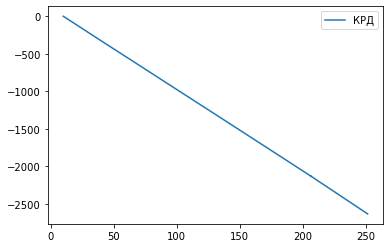

In [27]:
plt.plot(
    profile_result[ProfileVariables.PRESSURE],
    profile_result[ProfileVariables.MEASURED_DEPTH] * -1,
    label="КРД"
        )
plt.legend()

### Определим дебит, с которым работает скважина, с помощью узлового анализа

In [36]:
model = Model.open(model_directory + f"/{model_name}.pips", units=Units.METRIC)

model.tasks

INFO:manta.server.manager:Starting PIPESIM server on thread ID: 16616
C:\Users\Alexey\anaconda3\lib\subprocess.py:844: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stdout = io.open(c2pread, 'rb', bufsize)
INFO:sixgill.core.metadata:Using cached metadata for 'http://localhost:60815/api/metadata#'


In [39]:
parameters = {Parameters.NodalAnalysisSimulation.OUTLETPRESSURE: 10}
results = model.tasks.nodalanalysis.run(producer=model_name,
                              parameters=parameters
                             )

INFO:sixgill.core.simulations:Simulation is running.
INFO:sixgill.core.simulations:Simulation is finished.
INFO:sixgill.core.simulations:Simulation run successfully.


In [59]:
results.outflow_curves[0].curve_data

{'NodalPointVolumeFlowrateGasStockTank': [nan,
  5.443450896668814e-05,
  5.443450896668814e-08,
  4.0787127548673284e-05,
  1.6347511724849328e-05,
  2.6123358054378915e-05,
  6.571665395319742e-06,
  3.1988865852096665e-05,
  4.6246080115879226e-05,
  1.0482003927131575e-05,
  2.0257850256661162e-05,
  2.6613268635079106e-06,
  3.5508170530727315e-05,
  4.95214516562028e-05,
  1.2828207046218677e-05,
  2.2604053375748268e-05,
  2.8469561173466004e-05,
  4.225462276232644e-06,
  8.135800808044479e-06,
  4.297070857555565e-05,
  3.76197533379057e-05,
  1.0971914507831774e-06,
  1.7911647137574063e-05,
  5.148667458039694e-05,
  1.4235928917670938e-05,
  2.4011775247200522e-05,
  2.987728304491827e-05,
  5.163943523867485e-06,
  3.3396587723548916e-05,
  9.074282055679317e-06,
  4.4280857191685095e-05],
 'NodalPointPressure': [nan,
  73.89931056861606,
  70.55722021318977,
  69.12172056704956,
  68.4802966934559,
  68.08049114450077,
  69.57193102760583,
  68.22489924350316,
  70.436883

In [44]:
results.cases[0]

'Operating Point: Flowrate=207.7222 sbbl/day'

### Проведем адаптацию скважины на замер

In [62]:
# Определим коэффициент деградации насоса, такой чтобы расчетное давление на приеме совпадало с замерным

# Самостоятельно сделайте функцию которая будет определять коэффициент деградации насоса
# используя оптимизатор пакета scipy.optimize и функцию
from scipy.optimize import brentq

# Подставьте реальное значение p_in
p_in_fact = 1

def _opt_func(c_degr, p_in_fact, model) -> float:
    p_in = 1 # Добавьте сюда расчет и извлечение p_in
    
    model.set_value(context="Esp", parameter=Parameters.ESP.HEADFACTOR,
                         value=c_degr)
    # Рассчитайте давление на приеме
    
    return (p_in-p_in_fact)

c_degr = brentq(_opt_func, a=0.01, b=5, args=(p_in_fact, model))


# Проверим на расчете КРД

### Построим виртуальный расходомер 